In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import mpl_finance
from scipy import stats
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = glob.glob('./data/2017/*.txt')

col_names = ['code', 'name', 'open', 'high', 'low', 'close', 'volume']

# get code list
df_code = pd.read_csv(paths[0], delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
codes = df_code.iloc[1:, 0].as_matrix()

for path in tqdm(paths[1:]):

    df_code = pd.read_csv(path, delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
    codes = list(set(codes) & set(df_code.iloc[1:, 0].as_matrix()))
    
# code filtering
codes = np.array(codes)[np.array(codes) > 1700]

# get price data
df_all = pd.read_csv(paths[0], delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
date = str(df_all.iloc[0, 0])
date = date[:4] + '-' + date[4:6] + '-' + date[6:]
df_all['date'] = date
df_all = df_all.iloc[1:, :]
df_all = df_all[df_all['code'].isin(codes)]

for path in tqdm(paths[1:]):
    
    df = pd.read_csv(path, delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
    date = str(df.iloc[0, 0])
    date = date[:4] + '-' + date[4:6] + '-' + date[6:]
    df['date'] = date
    df = df.iloc[1:, :]
    df = df[df['code'].isin(codes)]
    df_all = pd.concat([df_all, df])

df_all['date'] = pd.to_datetime(df_all['date'])
df_all = df_all.sort_values(by=['code', 'date'], ascending=True)
print(len(df_all))

100%|██████████| 246/246 [00:15<00:00, 15.99it/s]


715806


In [3]:
c = 7203

start_date = '2017-01-01'
end_date = '2017-06-30'

* 一目均衡表
    * http://www.procrasist.com/entry/14-technical-analysis
    * https://www.jibunbank.co.jp/products/foreign_deposit/chart/help/ichimoku/

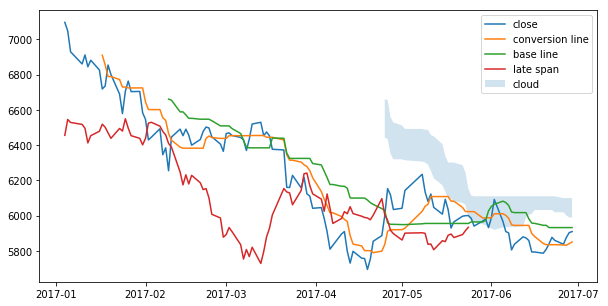

In [4]:
# 一目均衡表

df_tmp = df_all[df_all['code'] == c]
df_tmp = df_tmp[(start_date < df_tmp['date']) & (df_tmp['date'] < end_date)]

conversion_line_period = 9
base_line_period = 26
span_period = 52

conversion_line = (df_tmp['high'].rolling(window=conversion_line_period).max() + df_tmp['low'].rolling(window=conversion_line_period).min())/2
base_line = (df_tmp['high'].rolling(window=base_line_period).max() + df_tmp['low'].rolling(window=base_line_period).min())/2
leading_span1 = ((conversion_line + base_line)/2)[:-base_line_period]
leading_span2 = ((df_tmp['high'].rolling(window=span_period).max() + df_tmp['low'].rolling(window=span_period).min())/2)[:-base_line_period]
late_span = df_tmp['high'][base_line_period:]

plt.figure(figsize=(10, 5))
plt.plot(df_tmp['date'], df_tmp['close'])
plt.plot(df_tmp['date'], conversion_line, label='conversion line')
plt.plot(df_tmp['date'], base_line, label='base line')
plt.fill_between(df_tmp['date'][base_line_period:].as_matrix(), leading_span1, leading_span2, alpha=0.2, label='cloud')
plt.plot(df_tmp['date'][:-base_line_period].as_matrix(), late_span, label='late span')
plt.legend()
plt.show()